# TELECOM CHURN CASE STUDY

### Install imbalancd package

Need to install imbalanced package. Might have to restart the kernel to use it.</br>
This package is used later in the notebook to handle imbalanced data

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required classes and packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_roc_curve

from sklearn import metrics

## 1. Read the Data

In [3]:
churn = pd.read_csv('telecom_churn_data.csv', header = 0)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# check the count of rows and columns
churn.shape

(99999, 226)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking datatypes of the columns
churn.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [7]:
# Lot of columns. Increasing max rows and columns for display
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [8]:
# Viewing data types again
churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [9]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
churn.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

## 2. Data Preparation

In [11]:
# checking values of last_date_of_month columns
churn[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']].value_counts(dropna = False)

last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  last_date_of_month_9
6/30/2014             7/31/2014             8/31/2014             9/30/2014               98340
                                            NaN                   NaN                       564
                      NaN                   NaN                   NaN                       536
                      7/31/2014             8/31/2014             NaN                       494
                      NaN                   8/31/2014             NaN                        65
dtype: int64

In [12]:
# More than 98K records have same values. Others are NaN. There is no variance. Removing these columns
churn.drop(columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], inplace=True)

In [13]:
# 4 columns removed
churn.shape

(99999, 222)

In [14]:
# checking null values
print(churn.isna().sum())

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou

In [15]:
# Getting percentage of nulls 
round(churn.isna().sum()[churn.isna().sum().apply(lambda x: x>0)]*100/99999, 2)

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2f_mou

In [16]:
# few customers have not done data recharges. Thosde data is missing.
print(churn['date_of_last_rech_data_6'].isna().sum())
print(churn['total_rech_data_6'].isna().sum())
print(churn['max_rech_data_6'].isna().sum())
print(churn['count_rech_2g_6'].isna().sum())
print(churn['count_rech_3g_6'].isna().sum())
# All counts are same. User might not have done data recharges.
# This is same for other months as well.

74846
74846
74846
74846
74846


In [17]:
# We will remove the above date columns which are mostly empty and make numeric column to zero.
churn.drop(columns = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], inplace = True)
churn.shape

(99999, 218)

In [18]:
# Replacing nulls in recharge columns with 0
churn[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']] = churn[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']].fillna(0)


In [19]:
# Getting percentage of nulls 
round(churn.isna().sum()[churn.isna().sum().apply(lambda x: x>0)]*100/99999, 2)

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou_6        3.94
loc_og_t2c_mou_7        3.86
loc_og_t2c_mou_8        5.38
loc_og_t2c_mou

In [20]:
churn[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [21]:
# Since we are taking monthly activity for recharges. The date of recharge is not important. We already have the amount and number of recharge done in other columns
# We will remove these date columns
churn.drop(columns =['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], inplace = True)
churn.shape

(99999, 214)

In [22]:
# mou and arpu are numeric columns which have null values. These can be imputed with 0
mou_cols = list([col for col in churn.columns if 'mou' in col])
arpu_cols = list([col for col in churn.columns if 'arpu' in col])
churn[mou_cols] = churn[mou_cols].fillna(0)
churn[arpu_cols] = churn[arpu_cols].fillna(0)

#checking null percentage again
round(churn.isna().sum()[churn.isna().sum().apply(lambda x: x>0)]*100/99999, 2)


og_others_6          3.94
og_others_7          3.86
og_others_8          5.38
og_others_9          7.75
ic_others_6          3.94
ic_others_7          3.86
ic_others_8          5.38
ic_others_9          7.75
night_pck_user_6    74.85
night_pck_user_7    74.43
night_pck_user_8    73.66
night_pck_user_9    74.08
fb_user_6           74.85
fb_user_7           74.43
fb_user_8           73.66
fb_user_9           74.08
dtype: float64

In [23]:
# og and ic are calls. fb_user and night_pck are binary variable. NaN can be imputed with 0
# filling all NaN with 0
churn = churn.fillna(0)

#checking null percentage again
round(churn.isna().sum()[churn.isna().sum().apply(lambda x: x>0)]*100/99999, 2)

# no more nulls


Series([], dtype: float64)

In [24]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.

In [25]:
# There are so many columns which have only 0. Have no variance.
# Finding and removing these columns
no_var_col = []
for col in churn.columns:
    if ((churn[col].min() == 0) & (churn[col].max() == 0)):
        no_var_col.append(col)
no_var_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [26]:
# circle_id also has only one value- 109. Adding it to the list
no_var_col.append('circle_id')

In [27]:
churn[no_var_col].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,circle_id
count,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0


In [28]:
# dropping the no variance columns
churn.drop(columns = no_var_col, inplace = True)
churn.shape

(99999, 202)

## 3. Finding High Value Customers

We have total recharge amount for June and July, but we have to calculate total data recharge amount also.

In [29]:
# calculating Total data recharge amount for June from average data recharge amount and number of data recharges
churn['total_rech_amt_data_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']

In [30]:
# calculating Total data recharge amount for July from avergae data recharge amount and number of data recharges
churn['total_rech_amt_data_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']


In [31]:
# calculating total recharge amounts for each month as sum of ordinary recharge and data recharge
churn['total_rech_6'] = churn['total_rech_amt_6'] + churn['total_rech_amt_data_6']
churn['total_rech_7'] = churn['total_rech_amt_7'] + churn['total_rech_amt_data_7']

In [32]:
# calculating average recharge amount for June and July(the good phase)
churn['avg_rech_amt_6_7'] = (churn['total_rech_6'] + churn['total_rech_7'])/2

In [33]:
# checking 70th percentile of the avg recharge amount
churn['avg_rech_amt_6_7'].quantile(0.7)

478.0

In [34]:
# Selecting only high value customers
churn = churn[churn['avg_rech_amt_6_7'] >= 478]
churn.shape

(30001, 207)

In [35]:
# Removing additional columns created to find high value customers.
churn.drop(columns = ['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_6', 'total_rech_7', 'avg_rech_amt_6_7'], inplace = True)
churn.shape

(30001, 202)

## 4. Finding churned customers

In [36]:
# Adding new column to tag churned customers. This is the target variable
churn['churned'] = churn.apply(lambda churn: 1 if ((churn['total_ic_mou_9'] == 0) & 
                                                   (churn['total_og_mou_9'] == 0) & 
                                                   (churn['vol_2g_mb_9'] == 0) & 
                                                   (churn['vol_3g_mb_9'] == 0)) 
                                       else 0
                             , axis = 1)

In [37]:
# checking the target variable
churn[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churned']].head(10)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churned
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0
48,894.81,2319.01,0.00,0.00,0
53,680.61,503.06,0.82,0.00,0


In [38]:
# Selecting all columns from churn phase, which has '_9' in it
churned_cols = list([col for col in churn.columns if '_9' in col])
churned_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [39]:
# Removing churn phase columns
churn.drop(columns = churned_cols, inplace = True)
churn.shape

(30001, 154)

## 5. Exploratory Data Analysis(EDA)

In [40]:
churn.churned.value_counts(normalize = True)
# Only 8% customers have churned. Imbalanced data

0    0.918636
1    0.081364
Name: churned, dtype: float64

<AxesSubplot:xlabel='churned', ylabel='count'>

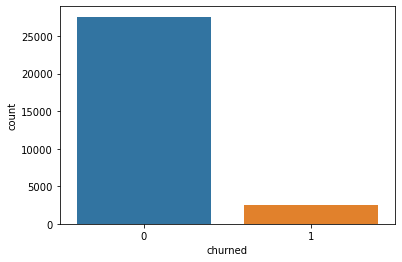

In [41]:
# plotting the churned column
sns.countplot(data=churn, x='churned')

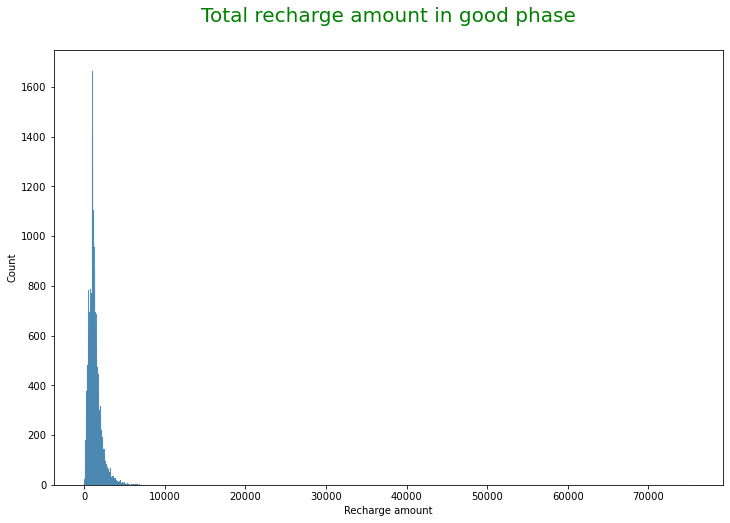

In [42]:
#histplot for total recharge amount in good phase
plt.figure(figsize=(12, 8))
sns.histplot(churn['total_rech_amt_6']+churn['total_rech_amt_7'])
plt.title('Total recharge amount in good phase\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Recharge amount')
plt.show()

Most of the recharge amounts are below 5000. Max values is around 70K

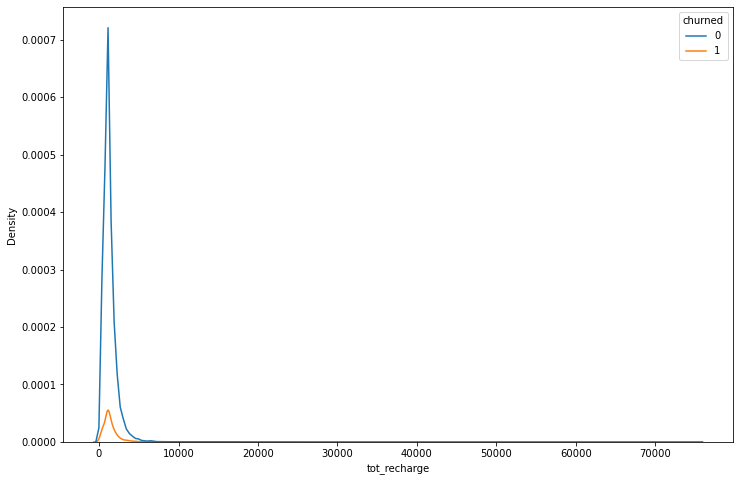

In [43]:
# Plotting the total recharge amount along with the trend in target variable
# Creating a new  variable for this. This will be dropped after the plot
churn['tot_recharge']= churn['total_rech_amt_6']+churn['total_rech_amt_7']
plt.figure(figsize=(12, 8))
sns.kdeplot(data=churn, x= 'tot_recharge', hue='churned')
churn.drop(columns='tot_recharge', inplace = True)

The density plot gives same trend for churned and unchurned customers

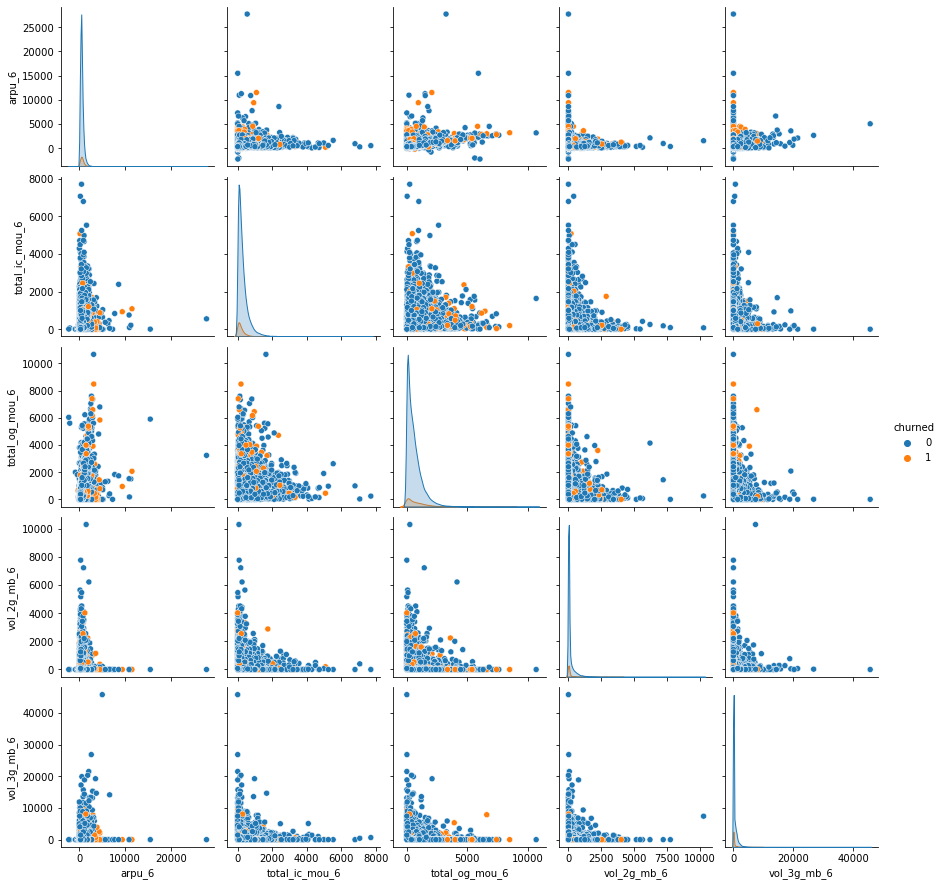

In [44]:
# Looking at pair plot of some variables
sns.pairplot(data = churn[['arpu_6', 'total_ic_mou_6', 'total_og_mou_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'churned']], hue = 'churned')

churn looks randomly distributes. No trends

<AxesSubplot:xlabel='churned', ylabel='aon'>

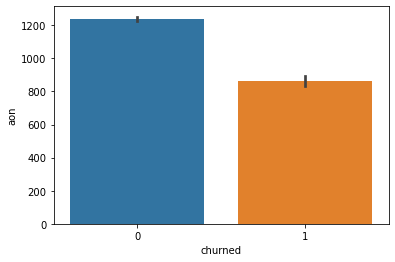

In [45]:
sns.barplot(data = churn, x='churned',y='aon')

<AxesSubplot:xlabel='aon', ylabel='Count'>

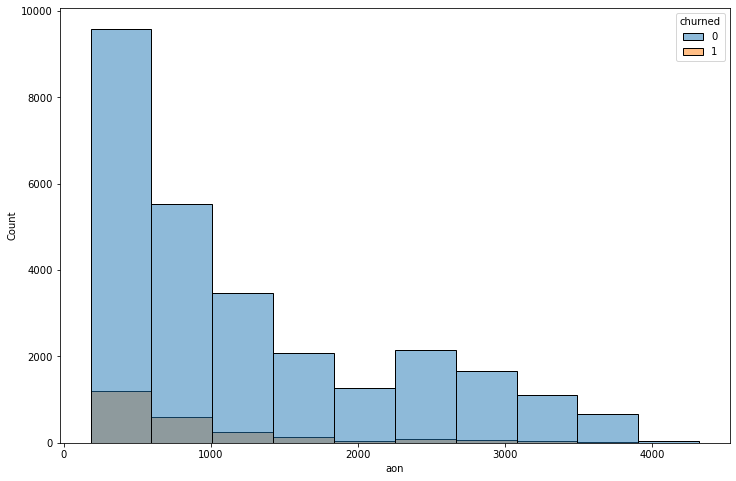

In [47]:
plt.figure(figsize = (12,8))
sns.histplot(data = churn, x = 'aon', bins=10, hue = 'churned')

Most customers have been in the network for less than 500 days and rate of churn also seems different

<AxesSubplot:title={'center':'Churn rate for customers with age on network greater than 500 days\n'}, xlabel='churned', ylabel='count'>

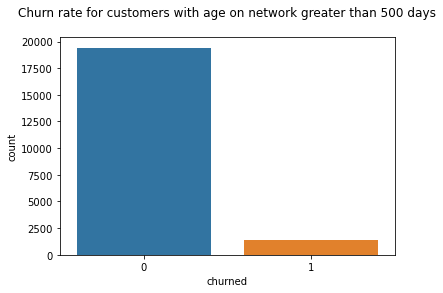

In [48]:
plt.title('Churn rate for customers with age on network greater than 500 days\n')
sns.countplot(churn[churn['aon']>500]['churned'])

<AxesSubplot:title={'center':'Churn rate for customers with age on network less than 500 days\n'}, xlabel='churned', ylabel='count'>

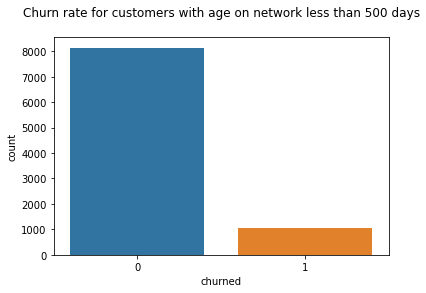

In [49]:
plt.title('Churn rate for customers with age on network less than 500 days\n')
sns.countplot(churn[churn['aon']<=500]['churned'])

churn rate is more for customer who have been on the network for lesser days

## 6. Test Train Split

In [50]:
from sklearn.model_selection import train_test_split

# Taking feature variables to X. We dont need id variable- mobile_number for this. Also dont need the target variable
X = churn.drop(['mobile_number', 'churned'],axis=1)

# Putting response variable to y
y = churn['churned']


In [51]:
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churned, dtype: int64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [53]:
X_train.shape

(21000, 152)

In [54]:
X_test.shape

(9001, 152)

## 7. Feature Scaling

In [55]:
# Take out all numeric variables and binary variables
num_cols = []
bin_cols = []
for col in X.columns:
    if ((X[col].min() == 0) and (X[col].max() == 1)):
        bin_cols.append(col)
    else:
        num_cols.append(col)        
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [56]:
X_train[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,210

In [57]:
# Initialising scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Taking a deep copy of train df for scaling
X_train_scaled = X_train.copy(deep=True)
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train_scaled[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.100000e+04,2.

## 8. PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [60]:
pca.components_

array([[-6.21360736e-02, -6.29299593e-02, -5.26871940e-02, ...,
         1.23927267e-01,  1.20020456e-01,  2.59286217e-02],
       [ 1.56256117e-01,  1.62914652e-01,  1.65257984e-01, ...,
         8.81343364e-02,  8.57274287e-02,  2.38468835e-02],
       [ 9.12123825e-02,  1.13757493e-01,  1.00274311e-01, ...,
         3.78297020e-02,  3.49701326e-02,  7.16348654e-03],
       ...,
       [ 0.00000000e+00, -1.91778593e-16,  1.38083614e-16, ...,
         2.05920143e-17, -3.64891387e-17, -2.97361457e-17],
       [-0.00000000e+00, -1.72744751e-17,  8.74594749e-17, ...,
         5.77229425e-17, -5.50955476e-17, -2.57389849e-17],
       [ 0.00000000e+00,  1.92538232e-16, -2.11261239e-16, ...,
         3.39673517e-19, -5.57050057e-17,  2.51637055e-18]])

Making a scree plot for the explained cumulative variance vs number of factors

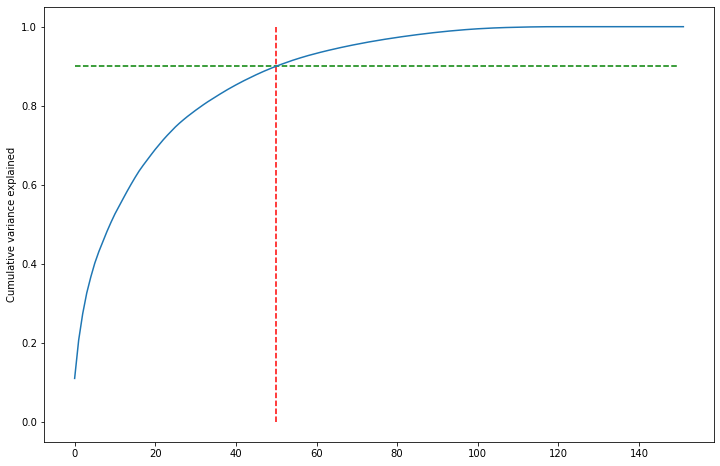

In [61]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

90% of the variance can be explained by 50 variables</br>
So, lets perform PCA now with 50 variables

In [62]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_train_pca.shape

(21000, 50)

## 9. Building first model on PCA data

In [63]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train)

In [64]:
y_pca_pred_train = model_pca.predict(X_train_pca)

In [65]:
y_pca_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
# Making confusion matrix
confusion = metrics.confusion_matrix(y_train, y_pca_pred_train )
print(confusion)

[[19105   204]
 [ 1296   395]]


In [67]:
#accuracy of the model
round(metrics.accuracy_score(y_train, y_pca_pred_train)*100, 2)

92.86

In [68]:
# Since we need to predict churns correctly, we should be looking at sensitivity/ recall
# sensitivity of the model
score = round(metrics.recall_score(y_train, y_pca_pred_train)*100, 2)
score

23.36

In [69]:
# Creating a table to hold the sensitivity score of different models
sens = [score, '']

sens_score = pd.DataFrame(sens, index = ['Sensitivity Score on Train set', 'Sensitivity Score on Test set'], columns=['Log_Reg_PCA'])

sens_score

,Log_Reg_PCA
Sensitivity Score on Train set,23.36
Sensitivity Score on Test set,


Sensitivity is low and thats a problem. This could be because of the class imbalance in the data.</br>
We need a way to correct the imbalance. Lets try SMOTE

## 10. Handling Data Imbalance through SMOTE

In [70]:
# Shape of our training data set
X_train_scaled.shape

(21000, 152)

In [71]:
# Churned rate
print(y_train.value_counts()) 
print(round(y_train.value_counts(normalize = True)*100, 2))

0    19309
1     1691
Name: churned, dtype: int64
0    91.95
1     8.05
Name: churned, dtype: float64


In [72]:
#SMOTE is a technique that creates new samples of the minority class to match the majority class
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_scld_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [73]:
X_train_scld_smote.shape

(38618, 152)

In [74]:
# The classes are balanced now
print(y_train_smote.value_counts())
print(round(y_train_smote.value_counts(normalize = True)*100, 2))

0    19309
1    19309
Name: churned, dtype: int64
0    50.0
1    50.0
Name: churned, dtype: float64


In [75]:
# SMOTE also puts random sample values for binary data. The binary columns will now have more than just 0 and 1
# checking one of the binary variables
X_train_scld_smote.fb_user_8.value_counts()

0.000000    25386
1.000000    11383
0.584588        1
0.250802        1
0.885045        1
            ...  
0.403550        1
0.875362        1
0.665584        1
0.415573        1
0.244410        1
Name: fb_user_8, Length: 1851, dtype: int64

In [76]:
# We have to round off these values
X_train_scld_smote[bin_cols] = round(X_train_scld_smote[bin_cols] )
X_train_scld_smote.fb_user_8.value_counts()

# Now we can continue with PCA

0.0    26320
1.0    12298
Name: fb_user_8, dtype: int64

### PCA on balanced data

In [77]:
pca2 = PCA(random_state=42)
pca2.fit(X_train_scld_smote)

PCA(random_state=42)

In [78]:
pca2.components_

array([[-8.75204564e-02, -8.28541145e-02, -4.30561179e-02, ...,
         9.91609609e-02,  1.01514530e-01,  1.69784815e-02],
       [ 1.43406945e-01,  1.70829238e-01,  1.80852406e-01, ...,
         8.98384344e-02,  7.72445082e-02,  2.49564143e-02],
       [ 7.76155466e-02,  7.99238401e-02,  4.26922807e-02, ...,
         4.06173934e-02,  4.09446796e-02,  5.65159547e-04],
       ...,
       [-0.00000000e+00,  2.49167458e-16, -2.22237198e-17, ...,
        -4.38151985e-17, -4.13641571e-17, -2.53295859e-17],
       [-0.00000000e+00,  1.77077038e-17, -2.89953795e-16, ...,
         6.38638932e-17, -5.94919899e-18, -3.50975916e-17],
       [ 0.00000000e+00, -4.31905368e-18, -7.85137189e-17, ...,
         2.94324511e-17, -1.15058253e-16,  9.69823794e-18]])

In [79]:
pca2.explained_variance_ratio_

array([1.12392425e-01, 9.22556242e-02, 6.35959163e-02, 5.71804653e-02,
       4.48447381e-02, 3.66040874e-02, 3.33858049e-02, 3.07433977e-02,
       2.53306793e-02, 2.36856598e-02, 2.17785983e-02, 1.95924321e-02,
       1.81941866e-02, 1.72850035e-02, 1.57620280e-02, 1.54390663e-02,
       1.45941965e-02, 1.45254936e-02, 1.37749960e-02, 1.34844276e-02,
       1.24056385e-02, 1.14906688e-02, 1.10163092e-02, 1.07765646e-02,
       1.01670276e-02, 1.00617644e-02, 9.36074080e-03, 9.10512455e-03,
       8.82715394e-03, 8.23249375e-03, 8.03222681e-03, 7.75418164e-03,
       7.30967188e-03, 6.96414282e-03, 6.81068485e-03, 6.33168882e-03,
       6.29146783e-03, 6.23228193e-03, 6.01332805e-03, 5.88089872e-03,
       5.49245718e-03, 5.32182092e-03, 5.19781304e-03, 4.89749888e-03,
       4.83293169e-03, 4.79934917e-03, 4.52274663e-03, 4.36679139e-03,
       4.04395891e-03, 3.92676546e-03, 3.85761538e-03, 3.68458955e-03,
       3.61245187e-03, 3.41845754e-03, 3.33751497e-03, 3.18204959e-03,
      

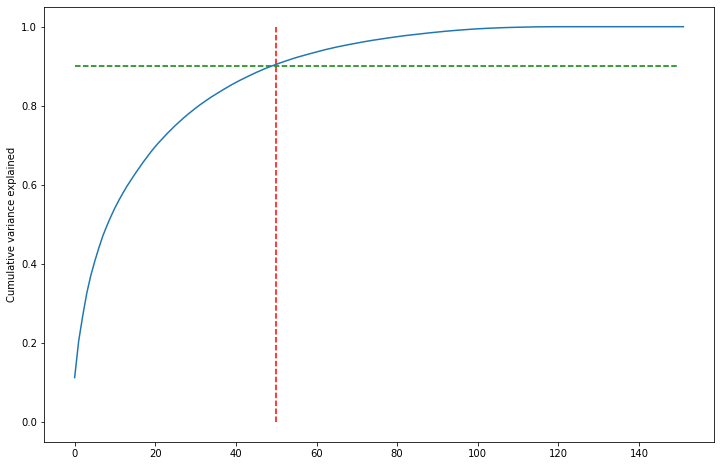

In [80]:
# Making a scree plot for explained variance
var_cumu = np.cumsum(pca2.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

It seems class imbalance does not affect PCA and its variables

In [81]:
pca_final2 = IncrementalPCA(n_components=50)
X_train_pca2 = pca_final2.fit_transform(X_train_scld_smote)
X_train_pca2.shape

(38618, 50)

In [82]:
# Trying second model on the balanced pca data
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(X_train_pca2, y_train_smote)

In [83]:
y_pca2_train_pred = model_pca2.predict(X_train_pca2)

In [84]:
score = round(metrics.recall_score(y_train_smote, y_pca2_train_pred)*100, 2)
score

85.77

In [85]:
# Adding sensitivity score of the model to the table
sens_score['Log_reg_PCA_Balanced']=''

sens_score.at['Sensitivity Score on Train set', 'Log_reg_PCA_Balanced'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced
Sensitivity Score on Train set,23.36,85.77
Sensitivity Score on Test set,,


The sensitivity score has improved to 85.64%

The model built on smote data is doing well on train data.</br>
Lets try the model on test data

In [86]:
X_test[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.00000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,557.068965,554.450751,502.496181,263.065439,267.816828,233.819909,373.560809,373.027980,335.065479,15.808795,11.911368,12.468151,27

In [87]:
# Taking a deep copy of test df for scaling
X_test_scaled = X_test.copy(deep=True)

#Scaling the test data. Only tranform.
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

X_test_scaled[num_cols].describe()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,-0.004298,-0.017964,-0.016347,0.007122,-0.000007,-0.000909,-0.000396,-0.014378,-0.000034,-0.005623,-0.013548,-0.000628,0.005783,-0

In [88]:
X_test_pca = pca_final2.transform(X_test_scaled)
X_test_pca.shape

(9001, 50)

In [89]:
y_pca_pred_test = model_pca2.predict(X_test_pca)

In [90]:
score = round(metrics.recall_score(y_test, y_pca_pred_test)*100, 2)
score

82.4

In [91]:
# add sensitivity of the model to the table
sens_score.at['Sensitivity Score on Test set', 'Log_reg_PCA_Balanced'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced
Sensitivity Score on Train set,23.36,85.77
Sensitivity Score on Test set,,82.4


## 11. Decision Tree Model

Though the above logistic regression model on Primary components works fine, we need a more interpretable model.</br>
So, lets try a decision tree

In [92]:
# We will take the original training data set for this
X_train.shape

(21000, 152)

In [93]:
y_train.value_counts()

0    19309
1     1691
Name: churned, dtype: int64

In [94]:
# Lets create a base model
dt_base = DecisionTreeClassifier(random_state=42, max_depth=5)

In [95]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [96]:
# Predictions on train set
y_train_dt_base_pred = dt_base.predict(X_train)

In [97]:
score = round(metrics.recall_score(y_train, y_train_dt_base_pred)*100, 2)
score

49.73

In [99]:
# Adding sensitivity score of the model to the table
sens_score['Base_Decision_Tree']=''

sens_score.at['Sensitivity Score on Train set', 'Base_Decision_Tree'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree
Sensitivity Score on Train set,23.36,85.77,49.73
Sensitivity Score on Test set,,82.4,


#### Plot the ROC curve

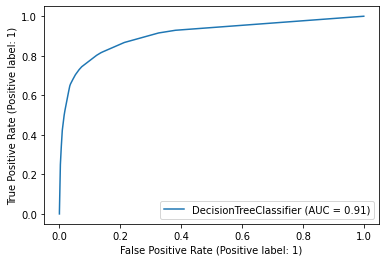

In [100]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

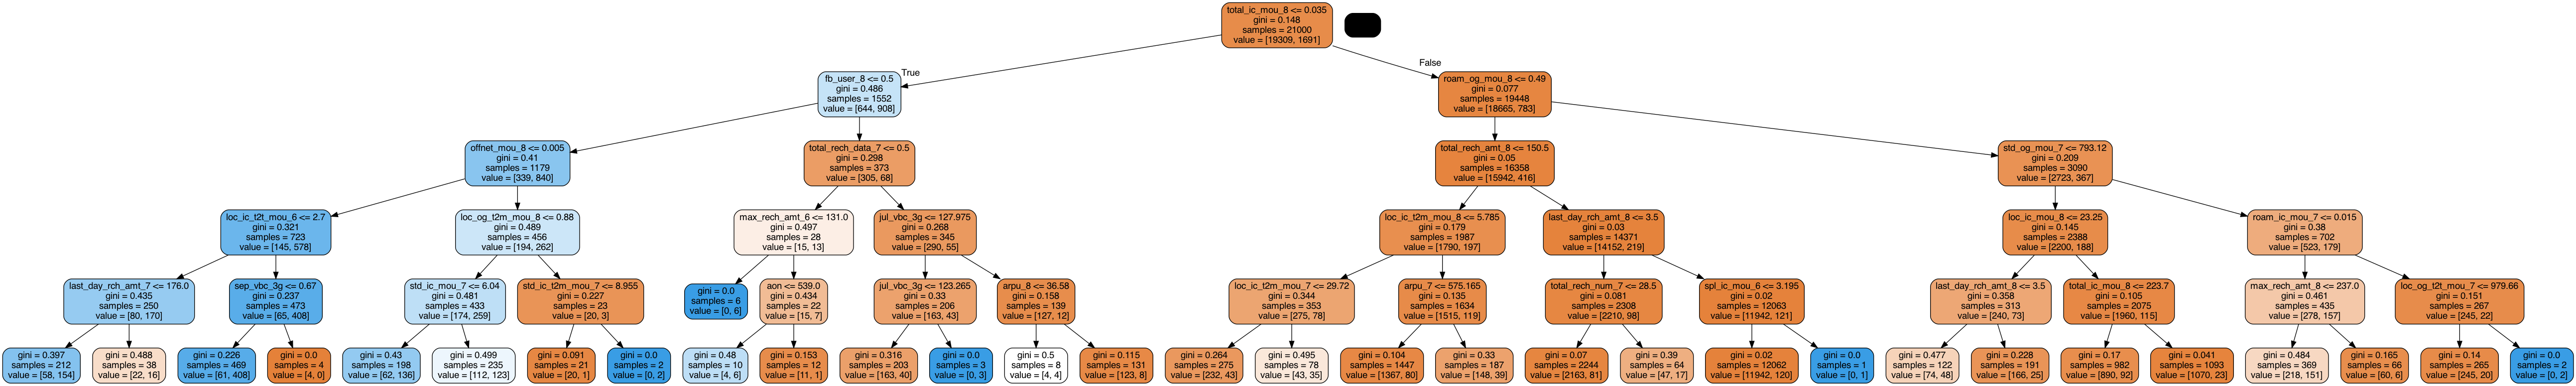

In [101]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt_base, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [102]:
# Predictions for base model on test data set
y_test_dt_base_pred = dt_base.predict(X_test)

In [103]:
score = round(metrics.recall_score(y_test, y_test_dt_base_pred)*100, 2)
score

49.73

In [104]:
# add sensitivity of the model to the table
sens_score.at['Sensitivity Score on Test set', 'Base_Decision_Tree'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree
Sensitivity Score on Train set,23.36,85.77,49.73
Sensitivity Score on Test set,,82.4,49.73


The score is a little low. Lets try the same on class balanced data

### Data Balancing for Decision Tree

In [105]:
X_train.shape

(21000, 152)

In [106]:
y_train.value_counts()

0    19309
1     1691
Name: churned, dtype: int64

In [107]:
smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote.shape

(38618, 152)

In [108]:
y_train_smote.value_counts()

0    19309
1    19309
Name: churned, dtype: int64

In [109]:
# Rounding off binary column values after smote
X_train_smote[bin_cols] = round(X_train_smote[bin_cols])

Decision Tree does not require scaling of parameters. So we will go ahead with the model.

In [110]:
# Creating a base model on balanced data
dt_bld_base = DecisionTreeClassifier(random_state=42, max_depth=5)

In [111]:
dt_bld_base.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [112]:
# Predictions on train set
y_train_dt_bld_base_pred = dt_bld_base.predict(X_train_smote)

In [113]:
score = round(metrics.recall_score(y_train_smote, y_train_dt_bld_base_pred)*100, 2)
score

86.02

In [114]:
# Adding sensitivity score of the model to the table
sens_score['Base_Decision_Tree_Balanced']=''

sens_score.at['Sensitivity Score on Train set', 'Base_Decision_Tree_Balanced'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced
Sensitivity Score on Train set,23.36,85.77,49.73,86.02
Sensitivity Score on Test set,,82.4,49.73,


In [115]:
# Predictions on test data
y_test_dt_bld_base_pred = dt_bld_base.predict(X_test)

In [116]:
score = round(metrics.recall_score(y_test, y_test_dt_bld_base_pred)*100, 2)
score

76.0

In [117]:
sens_score.at['Sensitivity Score on Test set', 'Base_Decision_Tree_Balanced'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced
Sensitivity Score on Train set,23.36,85.77,49.73,86.02
Sensitivity Score on Test set,,82.4,49.73,76.0


## 12. Hyperparameter tuning for Decision Tree

In [118]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [119]:
# initalising parameters for grid search
params = {
    "max_depth": [2,3,5,10,20,25,30],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [120]:
# Initialising grid search object. recall is the sccoring we are using
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [121]:
%%time
grid_search.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 42 candidates, totalling 168 fits
CPU times: user 2.94 s, sys: 225 ms, total: 3.17 s
Wall time: 59.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [122]:
#Best recall score from grid search
grid_search.best_score_

0.9185347617456283

In [123]:
# Lets look at the best hyper parameters
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [124]:
# Creating the best Decision Tree with the hyperparameters from above
dt_best = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)
dt_best.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [125]:
#predicting with dt_best on train set
y_train_dt_best_pred = dt_best.predict(X_train_smote)

In [126]:
# Adding sensitivity score of the model to the table
sens_score['Best_Decision_Tree']=''
score = round(metrics.recall_score(y_train_smote, y_train_dt_best_pred)*100, 2)
sens_score.at['Sensitivity Score on Train set', 'Best_Decision_Tree'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45
Sensitivity Score on Test set,,82.4,49.73,76.0,


In [127]:
# Making predictions on test set
y_test_dt_best_pred = dt_best.predict(X_test)

In [128]:
# add sensitivity of the model to the table
score = round(metrics.recall_score(y_test, y_test_dt_best_pred)*100, 2)
sens_score.at['Sensitivity Score on Test set', 'Best_Decision_Tree'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45
Sensitivity Score on Test set,,82.4,49.73,76.0,71.73


## 13. Using Random Forest

In [129]:
# Lets build a base random forest object
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=5, random_state=100, oob_score=True)

In [130]:
%%time
rf_base.fit(X_train_smote, y_train_smote)

CPU times: user 748 ms, sys: 27.8 ms, total: 776 ms
Wall time: 775 ms


RandomForestClassifier(max_depth=10, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [131]:
rf_base.oob_score_

0.8959552540266197

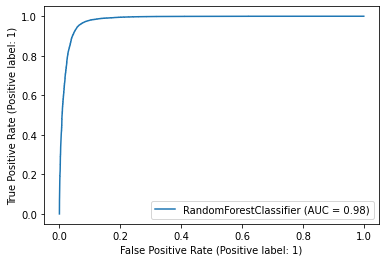

In [132]:
plot_roc_curve(rf_base, X_train_smote, y_train_smote)
plt.show()

In [133]:
#Make predictions on train set
y_rf_train_pred = rf_base.predict(X_train_smote)

In [134]:
# Adding sensitivity score of the model to the table
sens_score['Base_Random_Forest']=''
score = round(metrics.recall_score(y_train_smote, y_rf_train_pred)*100, 2)
sens_score.at['Sensitivity Score on Train set', 'Base_Random_Forest'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree,Base_Random_Forest
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45,95.05
Sensitivity Score on Test set,,82.4,49.73,76.0,71.73,


In [135]:
#Make predictions on test set
y_rf_test_pred = rf_base.predict(X_test)

In [136]:
# add sensitivity of the model to the table
score = round(metrics.recall_score(y_test, y_rf_test_pred)*100, 2)
sens_score.at['Sensitivity Score on Test set', 'Base_Random_Forest'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree,Base_Random_Forest
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45,95.05
Sensitivity Score on Test set,,82.4,49.73,76.0,71.73,72.8


## 14. Hyper-parameter tuning for the Random Forest using gridsearch

In [137]:
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)

In [138]:
params = {
    'max_depth': [2,3,5,10,20,25],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [139]:
# Initialising grid search. Recall is the scoring we are usign
grid_search_rf = GridSearchCV(estimator=rf_tuned,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [140]:
%%time
grid_search_rf.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
CPU times: user 34.6 s, sys: 573 ms, total: 35.2 s
Wall time: 7min 4s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [141]:
grid_search_rf.best_score_

0.9635394916814405

In [142]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [143]:
# Making the best random forest model
rf_best = RandomForestClassifier(max_depth=25, min_samples_leaf=5, random_state=42, n_jobs=-1, oob_score=True)

In [144]:
rf_best.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

In [145]:
#Make predictions on train set
y_rf_best_train_pred = rf_best.predict(X_train_smote)

In [146]:
# Adding sensitivity score of the model to the table
sens_score['Best_Random_Forest']=''
score = round(metrics.recall_score(y_train_smote, y_rf_best_train_pred)*100, 2)
sens_score.at['Sensitivity Score on Train set', 'Best_Random_Forest'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree,Base_Random_Forest,Best_Random_Forest
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45,95.05,99.29
Sensitivity Score on Test set,,82.4,49.73,76.0,71.73,72.8,


In [147]:
#Make predictions on test set
y_rf_best_test_pred = rf_best.predict(X_test)

In [148]:
# add sensitivity of the model to the table
score = round(metrics.recall_score(y_test, y_rf_best_test_pred)*100, 2)
sens_score.at['Sensitivity Score on Test set', 'Best_Random_Forest'] = score
sens_score

,Log_Reg_PCA,Log_reg_PCA_Balanced,Base_Decision_Tree,Base_Decision_Tree_Balanced,Best_Decision_Tree,Base_Random_Forest,Best_Random_Forest
Sensitivity Score on Train set,23.36,85.77,49.73,86.02,95.45,95.05,99.29
Sensitivity Score on Test set,,82.4,49.73,76.0,71.73,72.8,70.67


## 15. Choosing the model

From the above score metric we can see that the last models are overfitting as the predictions on the test data set doesnot have a good sensitivity/ recall.</br>


So, lets take the Logistic Regression model on the balanced data as the best model for predicting churn in high value customers 

**Best Model- Logistic Regression model on PCA**

Now, lets take another model- the base decision tree on the balanced data set to see which are the modt important variables and how we can prevent churn from happening

In [149]:
# Lets look at the important features for base decistion tree
imp_df = pd.DataFrame({
    "Varname": X_train_smote.columns,
    "Imp": dt_bld_base.feature_importances_
})

In [150]:
# This is the list of important features in descending order of importance
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.492996
14,roam_og_mou_8,0.192386
104,total_rech_data_8,0.078203
101,last_day_rch_amt_8,0.048116
95,total_rech_amt_8,0.046445
116,av_rech_amt_data_8,0.029288
53,total_og_mou_8,0.028311
1,arpu_7,0.015674
46,spl_og_mou_7,0.011466
29,loc_og_mou_8,0.008171


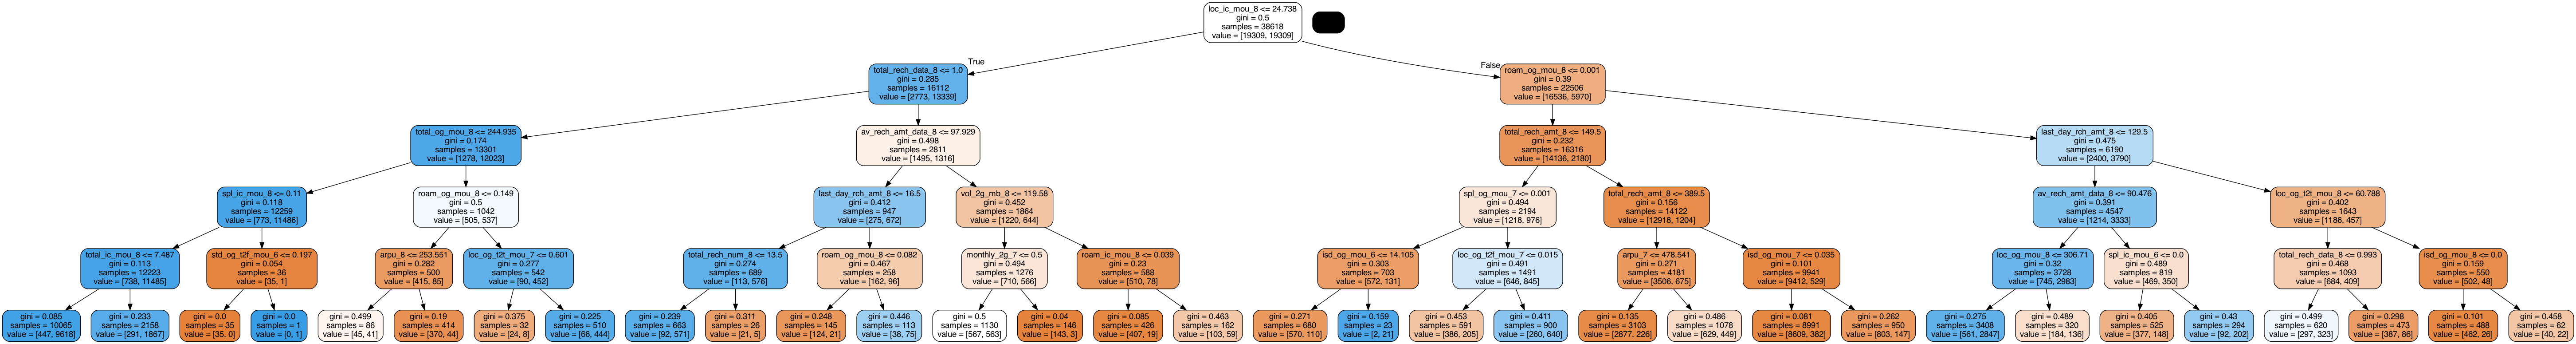

In [151]:
# Lets take a look at the actual tree model and see how the features can be interpreted.
dot_data = StringIO()

export_graphviz(dt_bld_base, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_smote.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## 16. Analysing important variables

Local Incoming calls Minutes of Usage in 8th month(action phase)

<AxesSubplot:title={'center':'Churn rate for customers with local incoming mou <= 23.087\n'}, xlabel='churned', ylabel='count'>

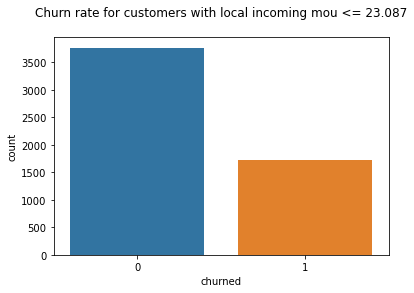

In [152]:
plt.title('Churn rate for customers with local incoming mou <= 23.087\n')
sns.countplot(churn[churn['loc_ic_mou_8']<=23.087]['churned'])

<AxesSubplot:title={'center':'Churn rate for customers with local incoming mou > 23.087\n'}, xlabel='churned', ylabel='count'>

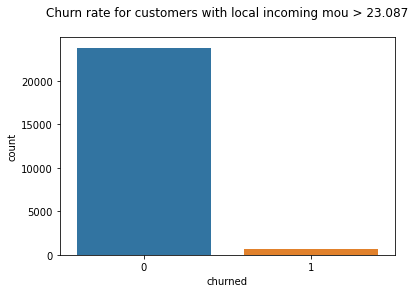

In [153]:
plt.title('Churn rate for customers with local incoming mou > 23.087\n')
sns.countplot(churn[churn['loc_ic_mou_8']>23.087]['churned'])

Clearly, the churn rate is different in 2 plots.
Minutes of usage of local incoming calls is a good indicator for churn

## Important Variables

From the decisiton tree, we can check the leaf nodes which are classified as churn(1) and find out important variables that determine churn in customers

Local Incoming Calls MoU in action phase</br>
Total Recharge in action phase</br>
Total Outgoing MoU in action phase</br>
Special Incoming MoU in action phase</br>
Total Recharge count in action phase</br>

From the decision tree we can see the values above or below which there is a chance that the customer will churn. 


## 17. Recommendations

The company should try and call such customers for feedback and understand the issues they are facing and try to resolve them.</br>
Also, promote offers based on their usage so that they do not make a churn

## THANK YOU